In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.440331  6.455077  6.391279  6.422877  493729600
2010-01-05  6.451466  6.487879  6.417459  6.458086  601904800
2010-01-06  6.348848  6.477047  6.342227  6.451467  552160000
2010-01-07  6.337111  6.379844  6.291067  6.372320  477131200
2010-01-08  6.379241  6.379843  6.291368  6.328684  447610800


In [10]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-12-23,68.757675,68.818201,67.878835,67.917572,98572000
2019-12-24,68.823029,68.973140,68.496193,68.924716,48478800
2019-12-26,70.188515,70.205464,68.927152,68.956204,93121200
2019-12-27,70.161865,71.171444,69.755132,70.481445,146266000
2019-12-30,70.578293,70.861558,69.053038,70.079558,144114400


In [11]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600
1,2010-01-05,6.451466,6.487879,6.417459,6.458086,601904800
2,2010-01-06,6.348848,6.477047,6.342227,6.451467,552160000
3,2010-01-07,6.337111,6.379844,6.291067,6.372320,477131200
4,2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [12]:
df = df.drop(['Date'],axis=1)
df.head()

/var/folders/1k/26p0wvvn3pq_5gdg1nyk14340000gn/T/ipykernel_75732/1737380413.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'],axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391279,6.422877,493729600
1,6.451466,6.487879,6.417459,6.458086,601904800
2,6.348848,6.477047,6.342227,6.451467,552160000
3,6.337111,6.379844,6.291067,6.372320,477131200
4,6.379241,6.379843,6.291368,6.328684,447610800


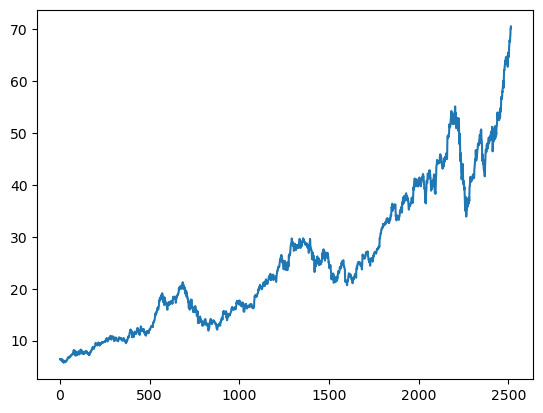

In [13]:
plt.plot(df.Close)

In [14]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.440331,6.455077,6.391279,6.422877,493729600
1,6.451466,6.487879,6.417459,6.458086,601904800
2,6.348848,6.477047,6.342227,6.451467,552160000
3,6.337111,6.379844,6.291067,6.372320,477131200
4,6.379241,6.379843,6.291368,6.328684,447610800
...,...,...,...,...,...
2510,68.757675,68.818201,67.878835,67.917572,98572000
2511,68.823029,68.973140,68.496193,68.924716,48478800
2512,70.188515,70.205464,68.927152,68.956204,93121200


In [16]:
MA100 =  df.Close.rolling(100).mean()
MA100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,57.212837
2511,57.410468
2512,57.647436
2513,57.875336


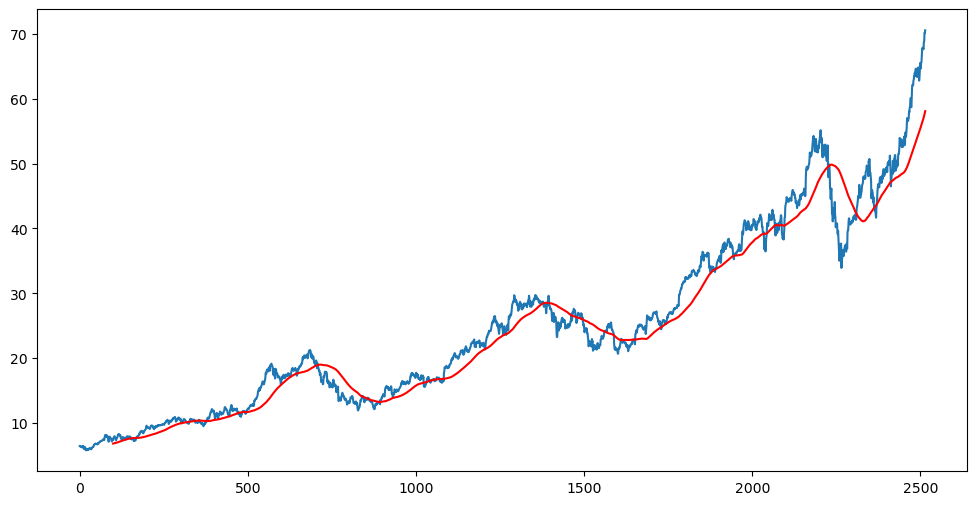

In [20]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(MA100,'r')

In [21]:
MA200 =  df.Close.rolling(200).mean()
MA200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2510,52.164464
2511,52.291900
2512,52.425206
2513,52.555958


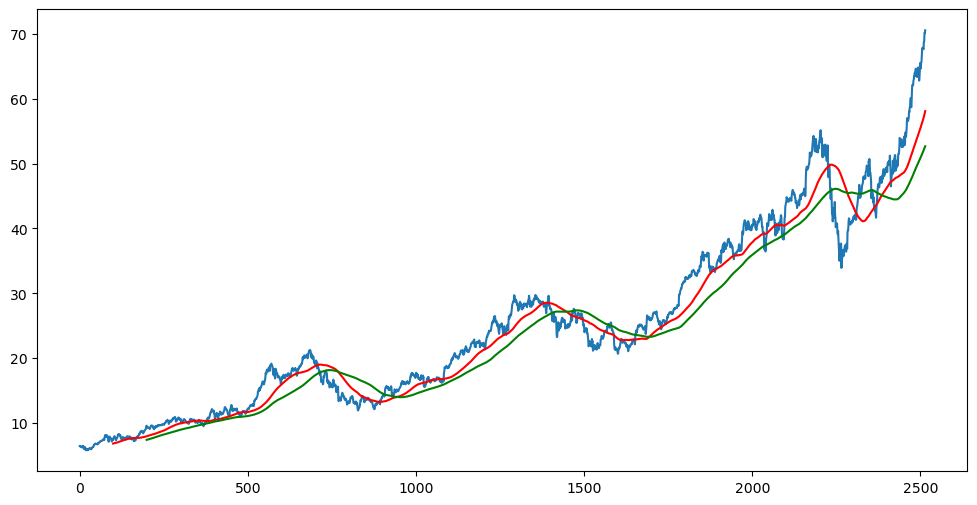

In [22]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(MA100,'r')
plt.plot(MA200,'g')

In [23]:
df.shape

(2515, 5)

In [25]:
#splitting data into Training and Testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing =  pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [26]:
data_training.head()

Ticker,AAPL
0,6.440331
1,6.451466
2,6.348848
3,6.337111
4,6.379241


In [27]:
data_testing.head()

Ticker,AAPL
1760,26.996561
1761,26.786106
1762,26.862427
1763,26.832361
1764,26.968815


In [28]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))


In [29]:
data_training_array = scalar.fit_transform(data_training)
data_training_array

array([[0.02760005],
       [0.02806506],
       [0.02377932],
       ...,
       [0.88408408],
       [0.89123178],
       [0.88640247]])

34$ -> 36 -> 33 -> 40 -> 39 ->? (depend on prev rates)
here step = 5  -> can have any 100 values- xtrain 
predicted value 101th is the ytrain value

y = mx+c

In [30]:
data_training_array.shape

(1760, 1)

In [32]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

ML MODEL

In [44]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

In [46]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', 
               return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu',
               return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu',
               return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))


In [47]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(optimizer='adam', loss= 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - loss: 0.0057
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 208ms/step - loss: 0.0034
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 190ms/step - loss: 0.0041
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 189ms/step - loss: 0.0030
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - loss: 0.0042
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 0.0032
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - loss: 0.0032
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 202ms/step - loss: 0.0034
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 232ms/step - loss: 0.0030
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - loss: 0.0034
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 231ms/step - loss: 0.0035
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - loss: 0.0037
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 0.0032
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - loss: 0.0033
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 9s 18

In [52]:
model.save('keras_model.h5')

In [53]:
data_testing.head()

Ticker,AAPL
1760,26.996561
1761,26.786106
1762,26.862427
1763,26.832361
1764,26.968815


In [54]:
data_training.tail(100)

Ticker,AAPL
1660,24.935093
1661,25.036333
1662,24.849958
1663,24.833853
1664,24.891378
...,...
1755,27.072884
1756,26.894810
1757,26.947992
1758,27.119137


In [56]:
past_100_days = data_training.tail(100)


In [59]:
import pandas as pd

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [79]:
final_df.shape

(855, 1)

In [60]:
final_df.head()

Ticker,AAPL
0,24.935093
1,25.036333
2,24.849958
3,24.833853
4,24.891378


In [61]:
input_data = scalar.fit_transform(final_df)

In [65]:
input_data

array([[0.02573541],
       [0.02789641],
       [0.0239182 ],
       [0.02357442],
       [0.02480232],
       [0.03118702],
       [0.03069594],
       [0.0299101 ],
       [0.0292225 ],
       [0.03059774],
       [0.02642309],
       [0.02809293],
       [0.02406554],
       [0.02180634],
       [0.01871221],
       [0.01812289],
       [0.01409546],
       [0.0145867 ],
       [0.01768092],
       [0.0225921 ],
       [0.02244488],
       [0.02568648],
       [0.01173799],
       [0.        ],
       [0.01134519],
       [0.02367262],
       [0.04243413],
       [0.06109737],
       [0.05790487],
       [0.05132361],
       [0.05127463],
       [0.05117643],
       [0.05643164],
       [0.0470508 ],
       [0.0478857 ],
       [0.04891716],
       [0.0531409 ],
       [0.04444779],
       [0.04872064],
       [0.04611754],
       [0.04847514],
       [0.04872064],
       [0.05284614],
       [0.05368116],
       [0.06345484],
       [0.06468257],
       [0.06979052],
       [0.068

In [67]:
input_data.shape

(855, 1)

In [66]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [64]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [80]:
#making prediction 

y_predicted = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step


In [81]:
y_predicted.shape

(100, 1)

In [82]:
y_test

[0.0697379231906714,
 0.06524571413356473,
 0.06687479590167089,
 0.06623304011842857,
 0.06914567416581407,
 0.07556319128544253,
 0.08089477603138429,
 0.08148722862021529,
 0.08464637863965763,
 0.08217816545948475,
 0.08114149556741479,
 0.08588050558614146,
 0.08583128381731953,
 0.08479457321245487,
 0.08588050558614146,
 0.08627554183335329,
 0.0857325145773179,
 0.09516143498433349,
 0.09545753914036481,
 0.09550692376036563,
 0.09392730803784965,
 0.09254498651856868,
 0.12907580368176386,
 0.12798974916969308,
 0.13070480402428053,
 0.1366781852662594,
 0.14279959822985655,
 0.14531711460444074,
 0.150027218538913,
 0.14853977658365336,
 0.15434069842717923,
 0.16291778503017407,
 0.16534748390653753,
 0.16455391011176757,
 0.1663884693548483,
 0.17124762283080697,
 0.1732800869690435,
 0.1704046237032415,
 0.17104927009490922,
 0.17238766250868243,
 0.17268498804855548,
 0.18656756249607376,
 0.18245263890767893,
 0.18651797431209927,
 0.18433682704752885,
 0.185229007231121

In [73]:
scalar.scale_

array([0.02134523])

In [77]:
scale_factor = 1/0.02134523
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

TypeError: can't multiply sequence by non-int of type 'float'

#ML Model 